# EDA

### Data Sources

https://www.kaggle.com/ma7555/schengen-visa-stats

https://www.heritage.org/index/

### Data Cleaning

In [79]:
import pandas as pd
%load_ext rpy2.ipython
%R library(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

In [80]:
df2017 = pd.read_csv('2017-data-for-consulates.csv')
df2018 = pd.read_csv('2018-data-for-consulates.csv')

In [81]:
df2017 = df2017.loc[(df2017['Schengen State'].notna())]
df2018 = df2018.loc[(df2018['Schengen State'].notna())]

In [82]:
df2017.groupby(df2017['Country where consulate is located'])
df_cols = ['Schengen State', 'Country where consulate is located', 'Consulate', \
           'Total ATVs and uniform visas applied for', \
           'Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) ']
new_cols = ['Schengen_State', 'Consulate_State', 'Consulate', 'Total_Applications', 'Total_Issued']
df2017 = df2017[df_cols]
df2017.columns = new_cols
df2018 = df2018[df_cols]
df2018.columns = new_cols

In [83]:
def clean(df):
    for col in df.columns:
        if col == 'Total_Applications' or col == 'Total_Issued':
            df[col] = df[col].str.replace(',','')
            df[col] = df[col].astype(float)
    return df

In [84]:
df2017 = clean(df2017)
df2018 = clean(df2018)

In [86]:
proportions2017 = df2017.groupby([df2017['Schengen_State']]).agg({'Total_Applications' : 'sum', 'Total_Issued' : 'sum'})
proportions2018 = df2018.groupby([df2018['Schengen_State']]).agg({'Total_Applications' : 'sum', 'Total_Issued' : 'sum'})
proportions2017 = proportions2017.reset_index()
proportions2018 = proportions2018.reset_index()
proportions2018.head(3)

,Schengen_State,Total_Applications,Total_Issued
0,Austria,306147.0,287049.0
1,Belgium,219861.0,174517.0
2,Czech Republic,662902.0,631581.0


In [141]:
len(proportions2018['Schengen_State'].unique())

25

### Explore data with graphs

In [87]:
# Acceptance, rejection rates grouped by each country (stacked bar) 
# with heights being total applications. Do 2017 and 2018 side by side

In [88]:
%R -i proportions2017 -i proportions2018

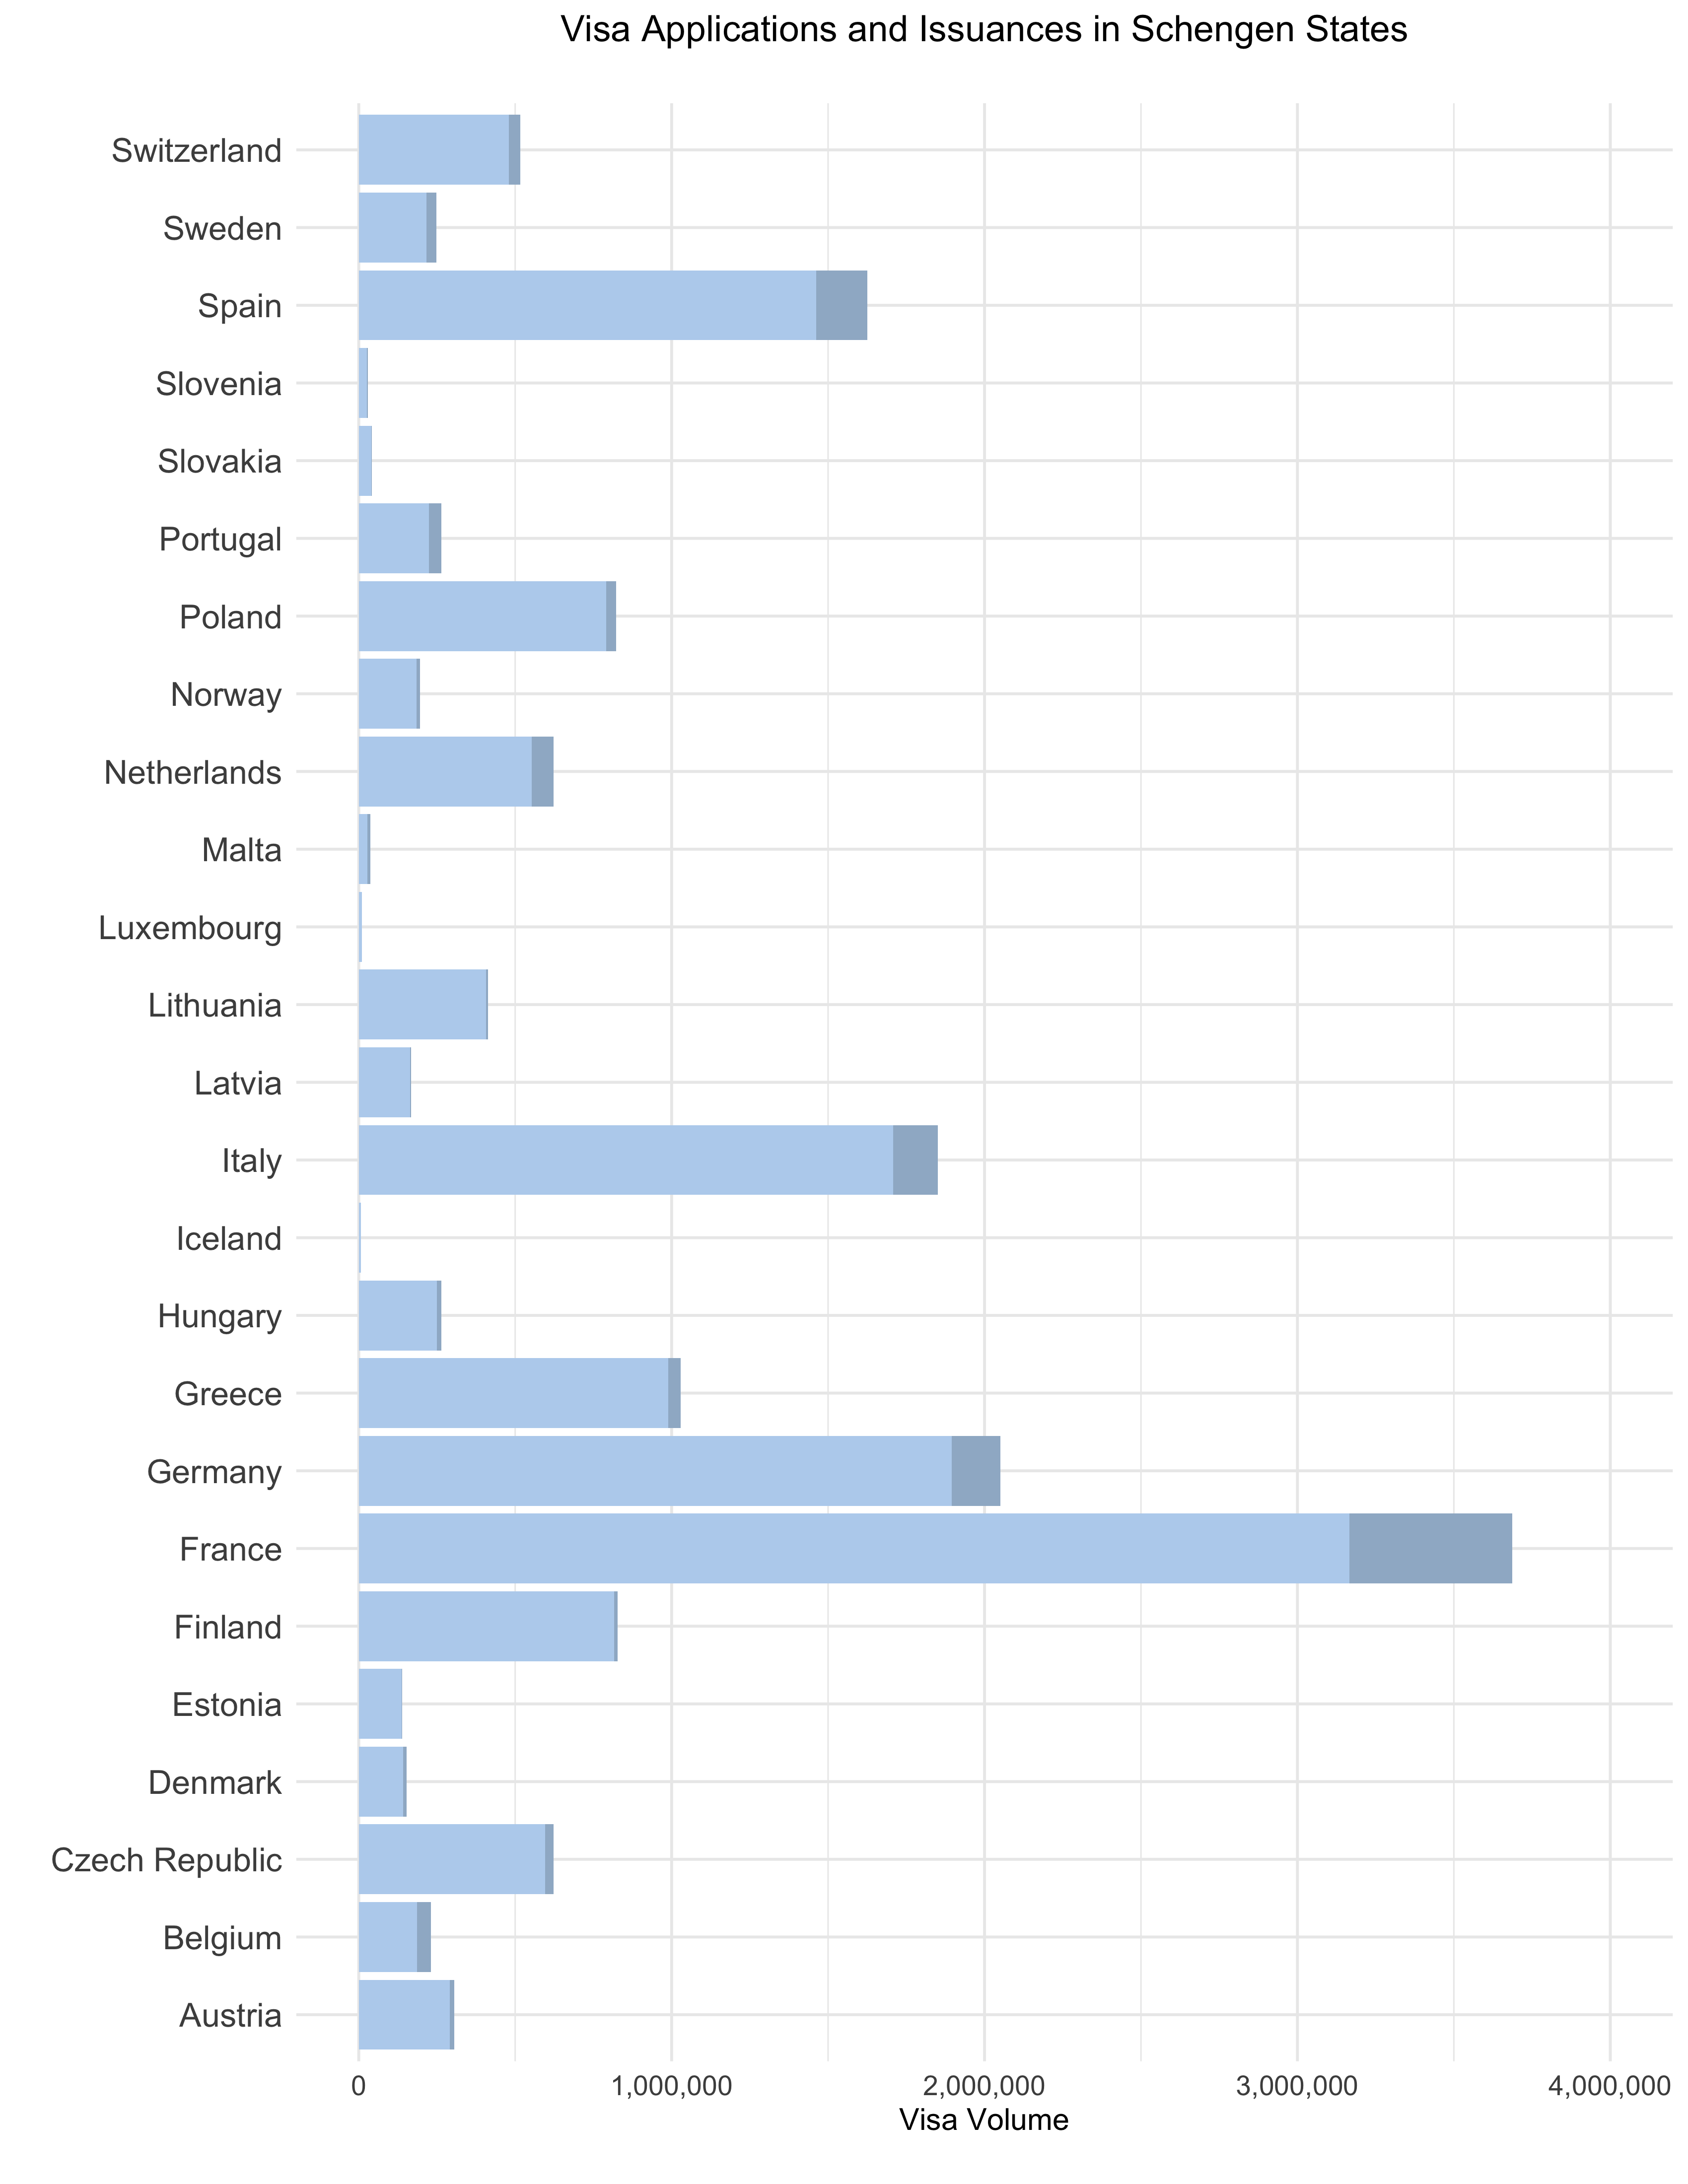

In [139]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 
geom_col(aes(x = Schengen_State, y = Total_Applications), fill = 'slategray3', data = proportions2017) +
geom_col(aes(x = Schengen_State, y = Total_Issued), fill = 'slategray2', data = proportions2017) +
scale_y_continuous(limits = c(0, 4000000), breaks = seq(0, 4000000, by = 1000000), labels = scales::comma) +
labs(title = 'Visa Applications and Issuances in Schengen States\n', y = 'Visa Volume\n', x = '') +
theme_minimal() +
theme(plot.title = element_text(hjust = 0.5), axis.text.y = element_text(size = 12), axis.text.x = element_text(size = 10)) +
coord_flip()

# add 2018 data


In [ ]:
# we see france has the largest proportions of rejections, 
# but also the highest application volume
# look into how Schengen countries GDPs compare on a scatter / treemap 

In [ ]:
%%R -w 8.5 -h 11 --units in -r 400

ggplot() + 

In [155]:
# read in dfs
efi_2018 = pd.read_csv('index2018_data.csv')
efi_2018.sort_values(by = ['2018 Score'], ascending = False, inplace = True)
efi_2017 = pd.read_csv('index2017_data.csv')
efi_2017.sort_values(by = ['2017 Score'], ascending = False, inplace = True)

In [156]:
# clean columns
efi_columns = ['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', \
               '2018 Score', 'Tariff Rate (%)', 'Trade Freedom', 'Population (Millions)', \
              'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'FDI Inflow (Millions)', \
               'Unemployment (%)', 'Inflation (%)', 'Public Debt (% of GDP)']
efi_columns2 = ['CountryID', 'Country Name', 'Region', 'World Rank', 'Region Rank', \
               '2017 Score', 'Tariff Rate (%)', 'Trade Freedom', 'Population (Millions)', \
              'GDP (Billions, PPP)', 'GDP per Capita (PPP)', 'FDI Inflow (Millions)', \
               'Unemployment (%)', 'Inflation (%)', 'Public Debt (% of GDP)']
efi_2018 = efi_2018[efi_columns]
efi_2017 = efi_2017[efi_columns2]
efi_2018.columns = ['CountryID', 'Country_Name', 'Region', 'World_Rank', 'Region_Rank', \
               '2018_Score', 'Tariff_Rate_Pct', 'Trade_Freedom', 'Population_MM', \
              'GDP_Billions_PPP', 'GDP_per_Capita_PPP', 'FDI_Inflow_MM', \
               'Unemployment_Pct', 'Inflation_Pct', 'Public_Debt_PctofGDP']
efi_2017.columns = ['CountryID', 'Country_Name', 'Region', 'World_Rank', 'Region_Rank', \
               '2017_Score', 'Tariff_Rate_Pct', 'Trade_Freedom', 'Population_MM', \
              'GDP_Billions_PPP', 'GDP_per_Capita_PPP', 'FDI_Inflow_MM', \
               'Unemployment_Pct', 'Inflation_Pct', 'Public_Debt_PctofGDP']
efi_2018.head(3)

,CountryID,Country_Name,Region,World_Rank,Region_Rank,2018_Score,Tariff_Rate_Pct,Trade_Freedom,Population_MM,GDP_Billions_PPP,GDP_per_Capita_PPP,FDI_Inflow_MM,Unemployment_Pct,Inflation_Pct,Public_Debt_PctofGDP
70,71,Hong Kong,Asia-Pacific,1.0,1.0,90.2,0.0,90.0,7.4,$429.7,"$58,321.6","108,126.0",3.4,2.6,0.1
146,147,Singapore,Asia-Pacific,2.0,2.0,88.8,0.0,90.0,5.6,$492.6,"$87,855.4","61,596.7",1.8,-0.5,112.0
119,120,New Zealand,Asia-Pacific,3.0,3.0,84.2,1.3,87.4,4.7,$177.0,"$37,294.0","2,291.6",5.2,0.6,29.5


In [157]:
#drop na
efi_2018 = efi_2018.loc[(efi_2018['Country_Name'].notna())]
efi_2017 = efi_2017.loc[(efi_2017['Country_Name'].notna())]

In [163]:
schengen_efi_2017 = efi_2017.loc[(efi_2017['Country_Name'].isin(['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']))]
schengen_efi_2018 = efi_2018.loc[(efi_2018['Country_Name'].isin(['Austria', 'Belgium', 'Czech Republic', \
        'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', \
        'Iceland','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', \
       'Netherlands', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', \
       'Slovenia', 'Spain', 'Sweden', 'Switzerland']))]